In [ ]:
# Cell 2: Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Cell 3: Transform (Normalize to [-1, 1])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))  # [-1, 1]
])

# Load dataset

train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)

print("Dataset Loaded")


100%|██████████| 170M/170M [00:04<00:00, 42.2MB/s]


Dataset Loaded


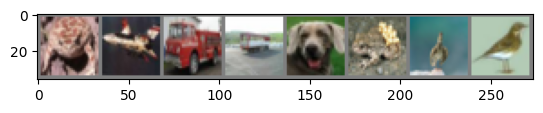

In [ ]:
# Cell 4: Function to show images

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:8]))


In [ ]:
# Cell 5: Encoder Decoder CNN

class EncoderDecoder(nn.Module):

    def __init__(self):
        super().__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),  # 32 -> 16
            nn.ReLU(),

            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 -> 8
            nn.ReLU(),

            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 -> 4
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256,128,4,stride=2,padding=1), # 4 -> 8
            nn.ReLU(),

            nn.ConvTranspose2d(128,64,4,stride=2,padding=1), # 8 -> 16
            nn.ReLU(),

            nn.ConvTranspose2d(64,3,4,stride=2,padding=1), # 16 -> 32
            nn.Tanh()
        )

    def forward(self,x):

        encoded = self.encoder(x)

        decoded = self.decoder(encoded)

        return decoded


In [ ]:
# Cell 6

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = EncoderDecoder().to(device)

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model Ready")


Model Ready


In [ ]:
# Cell 7

epochs = 10

for epoch in range(epochs):

    running_loss = 0

    for images, _ in train_loader:

        images = images.to(device)

        outputs = model(images)

        loss = criterion(outputs, images)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")


Epoch 1, Loss: 0.02768078705777064
Epoch 2, Loss: 0.0081872105189954
Epoch 3, Loss: 0.005566352479936331
Epoch 4, Loss: 0.004451880301765698
Epoch 5, Loss: 0.003747018230685969
Epoch 6, Loss: 0.003191718152519363
Epoch 7, Loss: 0.0027219712211097808
Epoch 8, Loss: 0.0024240824585670933
Epoch 9, Loss: 0.0022425989598354986
Epoch 10, Loss: 0.002017083947601564


Original Images


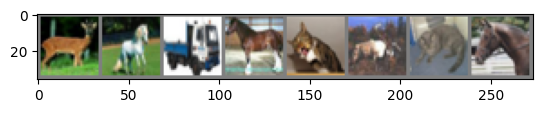

Reconstructed Images


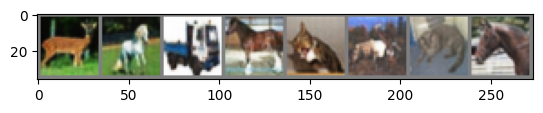

In [ ]:
# Cell 8

dataiter = iter(train_loader)

images, _ = next(dataiter)

images = images.to(device)

outputs = model(images)

images = images.cpu().detach()
outputs = outputs.cpu().detach()

print("Original Images")
imshow(torchvision.utils.make_grid(images[:8]))

print("Reconstructed Images")
imshow(torchvision.utils.make_grid(outputs[:8]))
